# Brainrex Crypto Sentiment - Quickstart
## We will learn how to install and use the sentiment API library. For python 
<img src="https://s3-eu-west-1.amazonaws.com/brainrex.com/img/products/sentiment-analysis-quickstart-brainrex-api.png">
Investor Sentiment Analysis
Audience
This tutorial is designed to let you quickly start exploring and developing applications with the BrainrexNatural Language API. 

This tutorial steps through a Natural Language API application using Python code. The purpose here is not to explain the Python client libraries, but to explain how to make calls to the Natural Language API. Applications in Java and Node.js are essentially similar. Consult the Natural Language API Samples for samples in other languages (including this sample within the tutorial).

## Prerequisites
In order to run this tutorial you need to do the following:
- You've installed the Brainrex Language Client for Python
- You have signed up for the Brainrex Free tier.
- You have created API keys 
- Store API keys as enviroment variables.
- Basic familiarity with Python programming.
- Set up your Python development environment. It is recommended that you have the latest version of Python 3.8.0, pip, and -virtualenv installed on your system.


## Part 1 - Making first API call and authentication
### Importing libraries we need for this tutorial. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import print_function
from pprint import pprint
import time
import pandas as pd


### Let's import the Brainrex API library called crypto_language. 
If you haven't installed yet.
Run the cell bellow. Skip if you have already installed installed

In [2]:
!pip install --user git+https://github.com/BrainrexAPI/crypto-language.git

  Cloning https://github.com/BrainrexAPI/crypto-language.git to /tmp/pip-req-build-y4zxh7uh
  Stored in directory: /tmp/pip-ephem-wheel-cache-d2k30gdl/wheels/2d/ab/c1/f22d1b1e3dbdbb7be9b3e3b38f817d9168300817c9488299f9
Successfully built crypto-language
You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import crypto_language
from crypto_language.rest import ApiException

### Let's initilize the SentimentAPIApi client. 

This object calls our API and authentificates.

In [4]:
# create an instance of the API class
api_instance = crypto_language.SentimentAPIApi()

### Introducing the Text object.

In [5]:
text = crypto_language.Text("Bitcoin is not the boring, but incredibly Binance coin is way better") # Text | String of text to be analyze for investor sentiment.

### Make your first API call.
#### A score from -1 to 1 will output. To see the explanation behind this scores visit brainrex.com/language

In [6]:
try:
    # Sentiment analysis score using a model trained for buy signals.
    api_response = api_instance.language_get_price_sentiment(text)
    pprint(api_response)
except ApiException as e:
    print("Exception when calling SentimentAPIApi->language_get_price_sentiment: %s\n" % e)

'-0.005499257046504272'


## Part 2 - Example 50 k tweets about Bitcoin
### Let's import an example dataset we collected for you. This dataset contains 50k tweets with the word Bitcoin on it. 

In [7]:
tweets_dataframe = pd.read_csv('https://s3-eu-west-1.amazonaws.com/brainrex.com/data/sample_text_data.csv')

In [8]:
tweetList= tweets_dataframe.Tweet.to_list()
tweetList[:5]

["RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",
 '@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy',
 'RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy  can unseat Facebook and change everything! ICO Live No…',
 'free coins https://t.co/DiuoePJdap',
 'RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…']

In [9]:
for index, tweet in enumerate(tweetList[0:10]): # Change the number of posts you want to analyze by changing this values. [start:end]
    try:
        text = crypto_language.Text(tweet)
        score = api_instance.language_get_price_sentiment(text)
        # TODO add response
        print('Sentence {} score of {}'.format(index, score))

    except ApiException as e:
        print("Exception when calling LanguageApi->language_get_price_sentiment: %s\n" % e)


Sentence 0 score of -0.16506363694828013
Sentence 1 score of -0.2075366577134209
Sentence 2 score of 0.06376619647336762
Sentence 3 score of -0.06335675908702329
Sentence 4 score of -0.17968296388069085
Sentence 5 score of -0.0672810979219844
Sentence 6 score of 0.05973972721866371
Sentence 7 score of 0.07427436561194896
Sentence 8 score of 0.18759530237947752
Sentence 9 score of 0.14893365958216537


## Let's analyze 500 sentences and graph the results

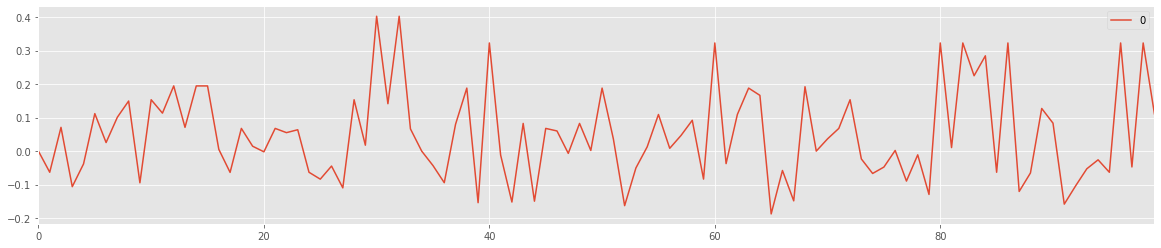

In [10]:
res = []
for tweet in tweetList[100:200]: # Change the number of posts you want to analyze by changing this values. [start:end]
    try:
        text = crypto_language.Text(tweet)
        api_response = api_instance.language_get_price_sentiment(text)
        res.append(api_response)
    except ApiException as e:
        print("Exception when calling LanguageApi->language_get_price_sentiment: %s\n" % e)
# Plot the results from the sentiment scores.
series = pd.DataFrame(res)
series=series.astype(float)
plt.style.use('ggplot')
series.plot(figsize=(20,4))

## Next Steps:

- Analyze anomalies in this scores using the Anomaly API.
- Build a real time.
- Use this scores to train a Reinforcement trading bot. 

